# Proyek Analisis Data: [E-Commerce Public Dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data)
- **Nama:** Krisna Santosa
- **Email:** M299B4KY2232@bangkit.academy, mamang.krisna15@gmail.com
- **ID Dicoding:** [krisna_santosa](https://www.dicoding.com/users/krisna_santosa)

## Menentukan Pertanyaan Bisnis

1. Kategori produk apa yang sedikit dan banyak diminati berdasarkan jumlah pesanan?
2. Wilayah mana yang memiliki pelanggan paling banyak?
3. Kapan terakhir pelanggan melakukan transaksi?
4. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
5. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [76]:
!pip install unidecode

In [77]:
import numpy as np
import pandas as pd
import urllib
import unidecode
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [78]:
# Menampilkan Data Customer
customers_df = pd.read_csv('https://raw.githubusercontent.com/KrisnaSantosa15/brazilian-e-commerce-analysis/main/data/olist_customers_dataset.csv')
customers_df.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [79]:
# Menampilkan Data Geolocation
geolocation_df = pd.read_csv('https://raw.githubusercontent.com/KrisnaSantosa15/brazilian-e-commerce-analysis/main/data/olist_geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [80]:
# Menampilkan Data Orders
orders_df = pd.read_csv('https://raw.githubusercontent.com/KrisnaSantosa15/brazilian-e-commerce-analysis/main/data/olist_orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [81]:
# Menampilkan Data Order Items
order_items_df = pd.read_csv('https://raw.githubusercontent.com/KrisnaSantosa15/brazilian-e-commerce-analysis/main/data/olist_order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [82]:
# Menampilkan Data Produk
products_df = pd.read_csv('https://raw.githubusercontent.com/KrisnaSantosa15/brazilian-e-commerce-analysis/main/data/olist_products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [83]:
# Menampilkan Data Kategori Produk
product_category_df = pd.read_csv('https://raw.githubusercontent.com/KrisnaSantosa15/brazilian-e-commerce-analysis/main/data/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Dataset yang digunakan adalah [Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data) yang merupakan data penjualan di E-commerce berbagai marketplace di brazil dengan total 100K order dari 2016 - 2018
- Data yang digunakan hanya Customers, Geolocation, Orders, Order Items, Products, dan Products Category

### Assessing Data

Pada tahapan ini kita akan melakukan assessing data yaitu menilai dataset dengan mengidentifikasi Missing Value, Duplicated Data, dan Inaccurate Value.

#### Assessing Customer Data

In [84]:
# Menampilkan Informasi Umum dari data
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [85]:
# Menghitung Missing Values Jika ada
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


Tidak terdapat missing value dalam data customer

In [86]:
# Menghitung Duplicated data
print("Duplicated Data: ",customers_df.duplicated().sum())

Duplicated Data:  0


Tidak ada data yang duplikat dalam data customer

In [87]:
# Menampilkan Parameter Statistika Deskriptif
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Belum terlihat data yang penting dari data customer saat ini, perlu dilakukan analisis lebih lanjut untuk melihat data demografi konsumen

#### Aseessing Data Geolocation

In [88]:
# Menampilkan Informasi Umum dari data
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [89]:
# Menghitung Missing Values Jika ada
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


Tidak terdapat missing values dalam data geolocation

In [90]:
geolocation_df['geolocation_city'].unique()

array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

Dalam data geolocation terdapat permasalahan, dimana kota sao paulo dihitung berbeda dengan são paulo. Untuk memperbaikinya kita bisa membuat data tersebut menjadi satu dengan membuat fungsi untuk konversi alhpabet diacritic menjadi alphabet biasa.

In [91]:
# Menampilkan data yang duplikat
geolocation_df[geolocation_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


#### Assessing Orders Data

In [92]:
# Menampilkan informasi umum data
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Tipe data `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date` harusnya datetime.

In [93]:
# Menghitung missing values
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [94]:
# Menghitung Duplicated Data
print("Duplicated Data: ",orders_df.duplicated().sum())

Duplicated Data:  0


Tidak terdapat duplicated data dalam orders data

In [95]:
# Menampilkan parameter statistik deskriptif
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Assessing Order Items data

In [96]:
# Menampilkan Informasi umum data
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [97]:
# Menghitung Missing values
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [98]:
# Menghitung duplicated data
print("Duplicated Data: ",order_items_df.duplicated("order_id").sum())

Duplicated Data:  13984


Terdapat banayk duplikat data dalam order items, hal ini karena satu order bisa memiliki lebih dari 1 produk yang dibeli.

In [99]:
# Menampilkan Parameter statistik deskriptif
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Assessing Products Data

In [100]:
# Menampilkan informasi umum data
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [101]:
# Menghitung missing values
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [102]:
# Menghitung duplicated data
print("Duplicated Data: ",products_df.duplicated().sum())

Duplicated Data:  0


In [103]:
# Menampilkan parameter statistik deskriptif
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Products:
- Ada banyak missing values pada hampir semua kolom kecuali product_id
- tipe data untuk kolom `product_name_lenght`, `product_description_lenght`, `product_photos_qty` yang seharusnya bertipe data integer
- ada kesalahan penulisan di kolom `product_name_lenght`, `product_description_lenght`

#### Assessing Product Category

In [104]:
# Menampilkan informasi umum Product category
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


#### Insight Assessing Data
**Insight:** <br>
Customers:
- Tidak ada Missing values
- Tidak ada inaccurate values
- Tidak ada Duplicated data

Geolocation:
- Tidak ada missing values
- Tidak ada inaccurate values
- Terdapat banyak data duplikat karena hanya menyimpan prefix zip code dan masalah kota sao paulo dihitung berbeda dengan são paulo.

Orders:
- adanya kesalahan tipe data dalam `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date` yang seharusnya bertipe data datetime

Order Items:
- ada banyak duplikat data, karena 1 order bisa memiliki banyak produk sekaligus

Products:
- Ada banyak missing values pada hampir semua kolom kecuali product_id
- tipe data untuk kolom `product_name_lenght`, `product_description_lenght`, `product_photos_qty` yang seharusnya bertipe data integer
- ada kesalahan penulisan di kolom `product_name_lenght`, `product_description_lenght`

### Cleaning Data

#### Cleaning Geolocation Data

Karena ada nama kota yang sama namun dihitung berbeda karena alphabet diacritic, maka kita akan bersihkan data tersebut agar sesuai.

In [105]:
# Fungsi untuk mengubah diacritic alphabet seperti ã menjadi a biasa.
def remove_diacritic(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [106]:
# Menerapkan fungsi remove_diacritic kedalam data
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].apply(remove_diacritic)

Karena Dataset ini hanya menyimpan prefix zip code, padahal setiap daerah memiliki suffix kode yang berbeda, maka kita harus mendapatkannya untuk menentukan lokasi lattitude dan longitude yang tepat.

In [107]:
# Menhitung jumlah duplikasi dalam prefix zip code
geolocation_df.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,
24220,1146
24230,1102
38400,965
35500,907
11680,879
...,...
20056,1
76370,1
63012,1


In [108]:
# Melihat contoh duplikasi data dengan kode zip 11680
geolocation_df[geolocation_df['geolocation_zip_code_prefix'] == 11680].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
256708,11680,-23.431627,-45.077229,ubatuba,SP
256710,11680,-23.450427,-45.076745,ubatuba,SP
256726,11680,-23.453805,-45.062904,ubatuba,SP
256727,11680,-23.431788,-45.076672,ubatuba,SP
256730,11680,-23.531875,-45.245981,ubatuba,SP


In [109]:
# Mencari kode pos yang dimiliki oleh 2 negara bagian, ini menjadi masalah karena biasanya kode pos hanya dimiliki oleh satu wilayah saja
zip_code_in_other_location = geolocation_df.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
zip_code_in_other_location[zip_code_in_other_location['count']>= 2].shape

(8, 2)

Terdapat 8 baris data negara bagian yang memiliki kode pos sama

In [110]:
# Menampilkan kode pos mana saja yang memiliki 2 lokasi
print(zip_code_in_other_location[zip_code_in_other_location['count']>= 2])

       geolocation_zip_code_prefix  count
367                           2116      2
1668                          4011      2
6506                         21550      2
6696                         23056      2
14664                        72915      2
15879                        78557      2
16146                        79750      2
16256                        80630      2


Dikarenakan dataset hanya menyimpan prefix zip code saja dan membuat kode zip yang sama digunakan untuk wilayah yang berbeda, maka akan kita hanya akan simpan zip code dengan wilayah yang sering muncul dari data saja.

In [111]:
# Hapus kode negara bagian yang duplikat dan simpan kode tersebut hanya untuk negara bagian yang sering muncul
max_state = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

Setelah zip code sudah unik, hitung median lattitude dan longitude untuk merepresentasikan kode zip code kedalam peta

In [112]:
# Mengelompokkan data berdasarkan zip_code, city, dan state, lalu hitung lattitude dan longitude berdasarkan nilai mediannya
geolocation_grouping = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
# Gabungkan dataframe dengan data frekuensi zip code paling sering muncul
geolocation_grouping = geolocation_grouping.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [113]:
# Menggabungkan data geolocation dengan data customer
customers_geolocation = customers_df.merge(geolocation_grouping,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

#### Cleaning Orders Data
Mengubah beberapa kolom menjadi timestamps

In [114]:
datetime_columns = ['order_purchase_timestamp','order_approved_at',
                     'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

#### Cleaning Order Items Data
Data order items memiliki banyak duplikat data, hal ini dikarenakan dalam satu order terdapat banyak produk yang dibeli. Oleh karena itu, kita harus mendapatkan total harga, shipping value dan nilai max dari shipping limit date

In [115]:
total_per_order = order_items_df.groupby('order_id').agg({'price':sum,'freight_value':sum,'shipping_limit_date':max }).reset_index()

<ipython-input-115-d0a551a6111e>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_per_order = order_items_df.groupby('order_id').agg({'price':sum,'freight_value':sum,'shipping_limit_date':max }).reset_index()
<ipython-input-115-d0a551a6111e>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_per_order = order_items_df.groupby('order_id').agg({'price':sum,'freight_value':sum,'shipping_limit_date':max }).reset_index()
<ipython-input-115-d0a551a6111e>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be 

<Axes: xlabel='price', ylabel='freight_value'>

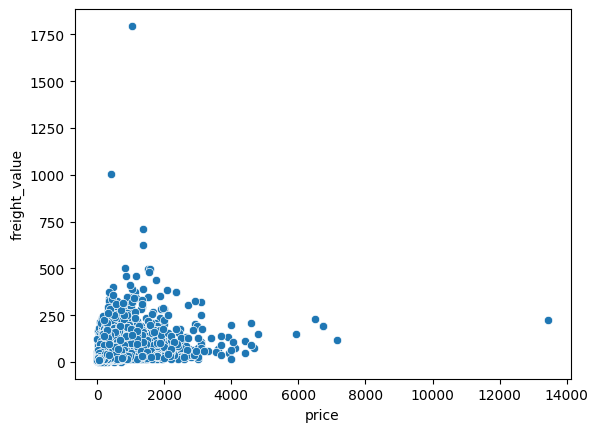

In [116]:
sns.scatterplot(x='price',y='freight_value',data=total_per_order)

Terdapat outlier dalam data, kita perlu menghapus data yang jauh dari 99% persentil

In [117]:
total_per_order.describe()

,price,freight_value
count,98666.000000,98666.000000
mean,137.754076,22.823562
std,210.645145,21.650909
min,0.850000,0.000000
25%,45.900000,13.850000
50%,86.900000,17.170000
75%,149.900000,24.040000
max,13440.000000,1794.960000


In [118]:
# Menghapus data outlier
percentil_freight_value = total_per_order['freight_value'].quantile(0.99)
total_per_order = total_per_order[(total_per_order['price'] <= 5000) & (total_per_order['freight_value'] <= percentil_freight_value)]

In [119]:
total_per_order.describe()

,price,freight_value
count,97679.000000,97679.000000
mean,132.046700,21.423227
std,185.015685,14.133667
min,0.850000,0.000000
25%,45.900000,13.790000
50%,85.000000,17.070000
75%,149.900000,23.700000
max,4690.000000,104.980000


Dapat dilihat bahwa outlier sangat berdampak terhadap perubahan data yang terjadi. seperti harga pesanan rata-rata adalah \$132

#### Cleaning Products Data

- Ada banyak missing values pada hampir semua kolom kecuali product_id
- tipe data untuk kolom `product_name_lenght`, `product_description_lenght`, `product_photos_qty` yang seharusnya bertipe data integer
- ada kesalahan penulisan di kolom `product_name_lenght`, `product_description_lenght`

In [120]:
# Mengubah nama kolom yang salah tulis
products_df.rename(columns={'product_name_lenght': 'product_name_length',
                            'product_description_lenght': 'product_description_length'},
                   inplace=True)

Kita akan isi semua missing values dengan mean

In [121]:
columns = [
    'product_name_length', 'product_description_length', 'product_photos_qty',
    'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'
]

for col in columns:
    products_df[col].fillna(products_df[col].mean(), inplace=True)

In [122]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_length,0
product_description_length,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


Kita akan isi product_category_name dengan metode interpolate

In [123]:
products_df['product_category_name'].interpolate(method='pad', axis=0, limit_direction='forward', inplace=True)

<ipython-input-123-6559977580f4>:1: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  products_df['product_category_name'].interpolate(method='pad', axis=0, limit_direction='forward', inplace=True)


In [124]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_length,0
product_description_length,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


Ubah tipe data kolom `product_name_lenght`, `product_description_lenght`, `product_photos_qty` menjadi integer

In [125]:
columns = ['product_name_length', 'product_description_length', 'product_photos_qty']

for col in columns:
    products_df[col] = products_df[col].astype(int)


In [126]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_length         32951 non-null  int64  
 3   product_description_length  32951 non-null  int64  
 4   product_photos_qty          32951 non-null  int64  
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 2.3+ MB


Gabungkan Products dan Product Category dengan metode outer

In [127]:
products_with_category_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how='outer',
    left_on='product_category_name',
    right_on='product_category_name'
)
products_with_category_df.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39,346,2,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52,150,1,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49,460,2,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56,733,3,377.0,18.0,13.0,15.0,perfumery


Gabungkan Order_items dengan Products

In [128]:
products_order_items = pd.merge(
    left=order_items_df,
    right=products_with_category_df,
    how='outer',
    left_on='product_id',
    right_on='product_id'
)
products_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58,598,4,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58,598,4,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58,598,4,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58,598,4,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58,598,4,650.0,28.0,9.0,14.0,cool_stuff


Gabungkan Orders dengan Customers

In [129]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_geolocation,
    how='outer',
    left_on='customer_id',
    right_on='customer_id'
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,3149.0,sao paulo,SP,-23.576170,-46.587276
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813.0,barreiras,BA,47813.0,barreiras,BA,-12.126651,-45.008162
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO,75265.0,vianopolis,GO,-16.744472,-48.514624
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296.0,sao goncalo do amarante,RN,59296.0,sao goncalo do amarante,RN,-5.774611,-35.273916
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,santo andre,SP,9195.0,santo andre,SP,-23.675316,-46.515116


Gabungkan Semua data

In [130]:
# Gabungkan semua data
all_data = pd.merge(
    left=products_order_items,
    right=orders_customers_df,
    how='outer',
    left_on='order_id',
    right_on='order_id'
)
all_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_length,product_description_length,...,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,28013.0,campos dos goytacazes,RJ,-21.762829,-41.310605
1,130898c0987d1801452a8ed92a670612,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,...,2017-07-26,0fb8e3eab2d3e79d92bb3fffbb97f188,75800.0,jatai,GO,75800.0,jatai,GO,-17.884665,-51.717341
2,532ed5e14e24ae1f0d735b91524b98b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,...,2018-06-07,3419052c8c6b45daf79c1e426f9e9bcb,30720.0,belo horizonte,MG,30720.0,belo horizonte,MG,-19.915673,-43.976732
3,6f8c31653edb8c83e1a739408b5ff750,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,...,2017-08-25,e7c828d22c0682c1565252deefbe334d,83070.0,sao jose dos pinhais,PR,83070.0,sao jose dos pinhais,PR,-25.517914,-49.125827
4,7d19f4ef4d04461989632411b7e588b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,...,2017-09-01,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400.0,conselheiro lafaiete,MG,36400.0,conselheiro lafaiete,MG,-20.660955,-43.785859


**Insight:**
- Semua data telah dibersihkan dari Missing Values, Duplicated Data, dan Inaccurate Value. Semua data telah siap untuk dieksplor dan divisualisasikan
- Semua Data telah digabungkan menjadi satu berdasarkan foreign_key tertentu

## Exploratory Data Analysis (EDA)

### Explore All Data

In [131]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117568 entries, 0 to 117567
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117568 non-null  object        
 1   order_item_id                  116773 non-null  float64       
 2   product_id                     116773 non-null  object        
 3   seller_id                      116773 non-null  object        
 4   shipping_limit_date            116773 non-null  object        
 5   price                          116773 non-null  float64       
 6   freight_value                  116773 non-null  float64       
 7   product_category_name          116773 non-null  object        
 8   product_name_length            116773 non-null  float64       
 9   product_description_length     116773 non-null  float64       
 10  product_photos_qty             116773 non-null  float64       
 11  

In [132]:
# Describe
all_data.describe()

,order_item_id,price,freight_value,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,116773.000000,116773.000000,116773.000000,116773.000000,116773.000000,116773.000000,116773.000000,116773.000000,116773.000000,116773.000000,117568,117403,115547,114240,117568,117262.000000,117262.000000,117262.000000,117262.000000
mean,1.198342,120.804169,20.005671,48.767609,788.547258,2.206743,2098.879090,30.175010,16.591308,23.014856,2017-12-31 13:40:14.162161664,2017-12-31 23:52:37.391165440,2018-01-05 03:40:58.584783872,2018-01-14 14:56:10.651540736,2018-01-24 09:58:57.778987264,35294.677909,35294.677909,-21.193908,-46.215771
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1003.000000,1003.000000,-33.690972,-72.670987
25%,1.000000,39.900000,13.080000,43.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,2017-09-13 14:55:13,2017-09-13 22:47:10.500000,2017-09-18 21:40:37,2017-09-26 21:22:32.750000128,2017-10-04 00:00:00,11437.000000,11437.000000,-23.588086,-48.068549
50%,1.000000,74.990000,16.280000,51.000000,610.000000,2.000000,700.000000,25.000000,13.000000,20.000000,2018-01-19 11:01:51,2018-01-19 17:18:22,2018-01-24 18:48:43,2018-02-02 20:42:18,2018-02-15 00:00:00,24436.000000,24436.000000,-22.920643,-46.639559
75%,1.000000,134.900000,21.160000,57.000000,982.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,2018-05-04 13:56:23,2018-05-04 18:15:54,2018-05-08 13:15:00,2018-05-15 19:49:37.500000,2018-05-25 00:00:00,59848.750000,59848.750000,-20.069626,-43.694505
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,99990.000000,99990.000000,45.065933,9.341528
std,0.704493,183.869641,15.787906,9.954789,648.350549,1.709434,3758.442736,16.169183,13.430369,11.733221,NaN,NaN,NaN,NaN,NaN,29863.767153,29863.767153,5.558591,4.031736


In [133]:
# Hitung jumlah pesanan per kategori produk
order_category_df = all_data.groupby('product_category_name_english')['order_id'].nunique().reset_index(name='order_count')

# Sort untuk kategori terbaik dan terburuk
best_categories = order_category_df.sort_values(by='order_count', ascending=False).head(5)
best_categories

,product_category_name_english,order_count
7,bed_bath_table,9534
43,health_beauty,8970
65,sports_leisure,7803
15,computers_accessories,6711
39,furniture_decor,6580


In [134]:
worst_categories = order_category_df.sort_values(by='order_count', ascending=True).head(5)
worst_categories

,product_category_name_english,order_count
61,security_and_services,2
29,fashion_childrens_clothes,8
11,cds_dvds_musicals,12
52,la_cuisine,13
46,home_comfort_2,24


In [135]:
# Hitung Jumlah Customers setiap wilayah
state_customer_counts = all_data.groupby('geolocation_state')['customer_unique_id'].nunique().reset_index(name='customer_count')
# Mengurutkan berdasarkan jumlah pelanggan (dari yang terbanyak ke yang paling sedikit)
state_customer_counts_sorted = state_customer_counts.sort_values(by='customer_count', ascending=False)
print(state_customer_counts_sorted)

   geolocation_state  customer_count
25                SP           40267
18                RJ           12353
10                MG           11248
22                RS            5273
17                PR            4871
23                SC            3534
4                 BA            3268
7                 ES            1959
8                 GO            1939
6                 DF            1913
15                PE            1605
5                 CE            1310
13                PA             946
12                MT             875
9                 MA             722
11                MS             694
14                PB             517
16                PI             479
19                RN             472
1                 AL             400
24                SE             341
26                TO             272
20                RO             238
2                 AM             143
0                 AC             116
3                 AP              67
2

**Insight:**
- Kategori Produk yang paling banyak diminati berdasarkan jumlah pesanan adalah bed bath services
- Kategori Produk yang paling sedikit diminati berdasarkan jumlah pesanan adalah security and services
- wilayah yang memiliki banyak pelanggan adalah SP atau Sao Paulo
- wilayah yang memiliki sedikit pelanggan adalah RJ atau Rio de Janeiro

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori Produk mana yang banyak dan sedikit diminati berdasarkan jumah pesanan

<ipython-input-136-ce88997d068b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_count", y="product_category_name_english", data=best_categories, palette=colors, ax=ax[0])
<ipython-input-136-ce88997d068b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_count", y="product_category_name_english", data=worst_categories, palette=colors, ax=ax[1])


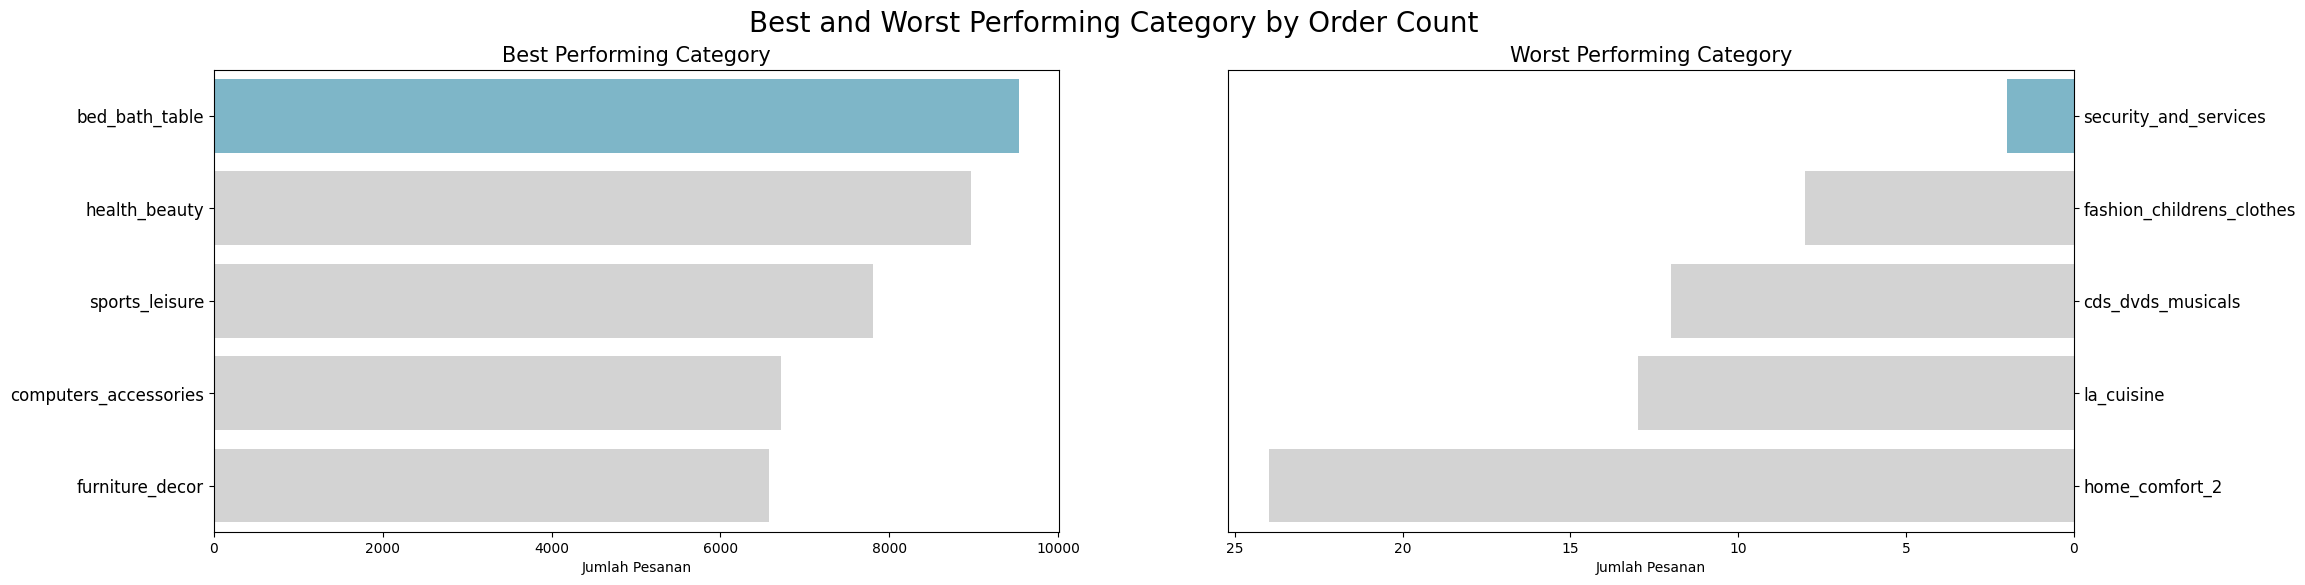

In [136]:
# Visualisasi
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Plot kategori terbaik
sns.barplot(x="order_count", y="product_category_name_english", data=best_categories, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel('Jumlah Pesanan')
ax[0].set_title("Best Performing Category", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

# Plot kategori terburuk
sns.barplot(x="order_count", y="product_category_name_english", data=worst_categories, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('Jumlah Pesanan')
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Category", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Category by Order Count", fontsize=20)
plt.show()


### Pertanyaan 2: Wilayah mana yang memiliki pelanggan paling banyak?

In [137]:
print(state_customer_counts_sorted.head(5))

   geolocation_state  customer_count
25                SP           40267
18                RJ           12353
10                MG           11248
22                RS            5273
17                PR            4871


In [138]:
# Fungsi untuk memetakan setiap titik kedalam gambar
def plot_brasil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='blue')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

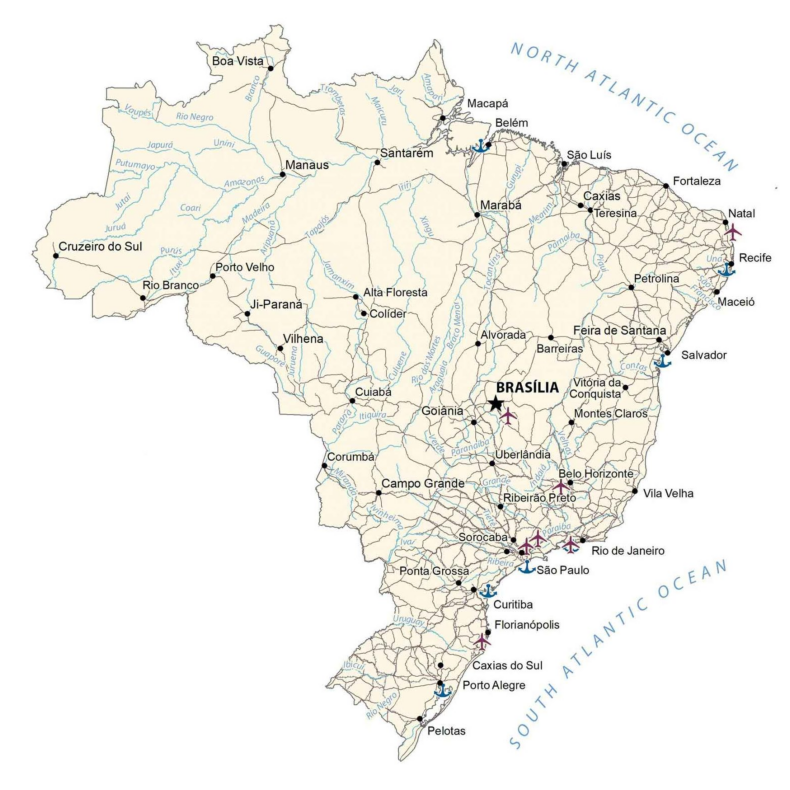

In [139]:
# Load brazil map
brazil_plain = mpimg.imread(urllib.request.urlopen('https://gisgeography.com/wp-content/uploads/2024/05/Brazil-Map-1536x1536.jpg'), 'jpg')
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(brazil_plain)
ax.axis('off')
plt.show()

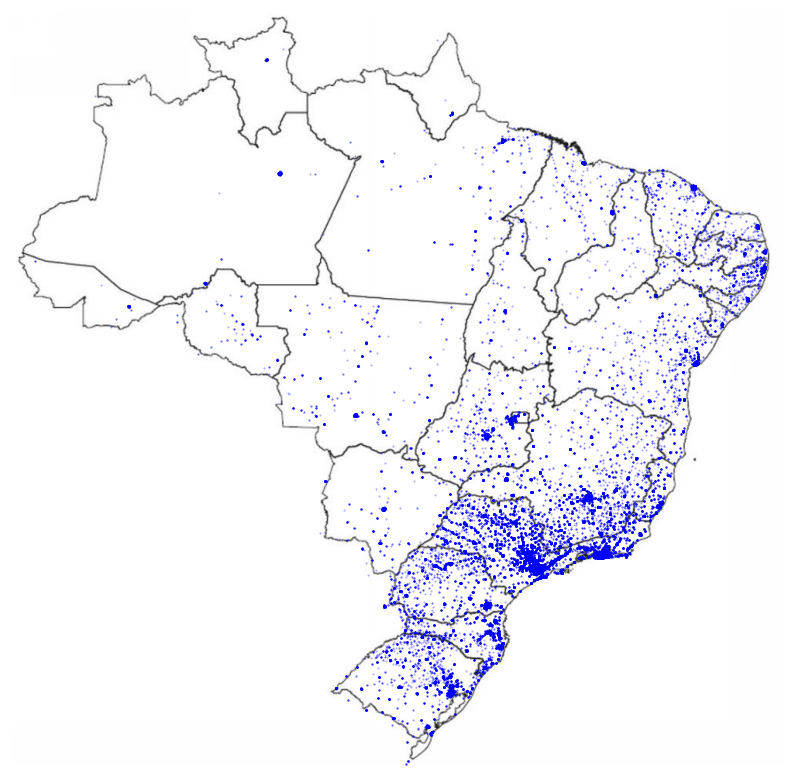

In [140]:
plot_brasil_map(all_data.drop_duplicates(subset='customer_unique_id'))

**Insight:**
- Kategori Produk yang paling banyak diminati berdasarkan jumlah pesanan adalah bed bath services dengan jumlah order 9534 dan Kategori Produk yang paling sedikit diminati berdasarkan jumlah pesanan adalah security and services dengan jumlah order 2
- Berdasarkan data, pelanggan yang paling banyak berada di wilayah yang besar seperti Sao Paulo, Rio de Janiero yang merupakan wilayah padat penduduk.

## Analisis Lanjutan (Opsional)

### RFM Analysis

In [141]:
# Mengelompokkan data berdasarkan customer_id dan menghitung nilai recency, frequency, monetary
rfm_df = all_data.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max",    # Mengambil tanggal order terakhir
    "customer_id": "nunique",  # Menghitung jumlah order (frequency)
    "price": "sum"    # Menghitung total revenue (monetary)
})

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# Menghitung nilai recency berdasarkan tanggal terakhir order (berapa hari sejak transaksi terakhir)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_data["order_purchase_timestamp"].dt.date.max()  # Mendapatkan tanggal terakhir dalam dataset
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()


,customer_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,259.80,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,163
2,0000f46a3911fa3c0805444483337064,1,69.00,586
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,370
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,337


<ipython-input-142-a699c277635f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-142-a699c277635f>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')  # Rotate and align text
<ipython-input-142-a699c277635f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-142-a699c277635f>:22: UserWarning: FixedFormatter should only be

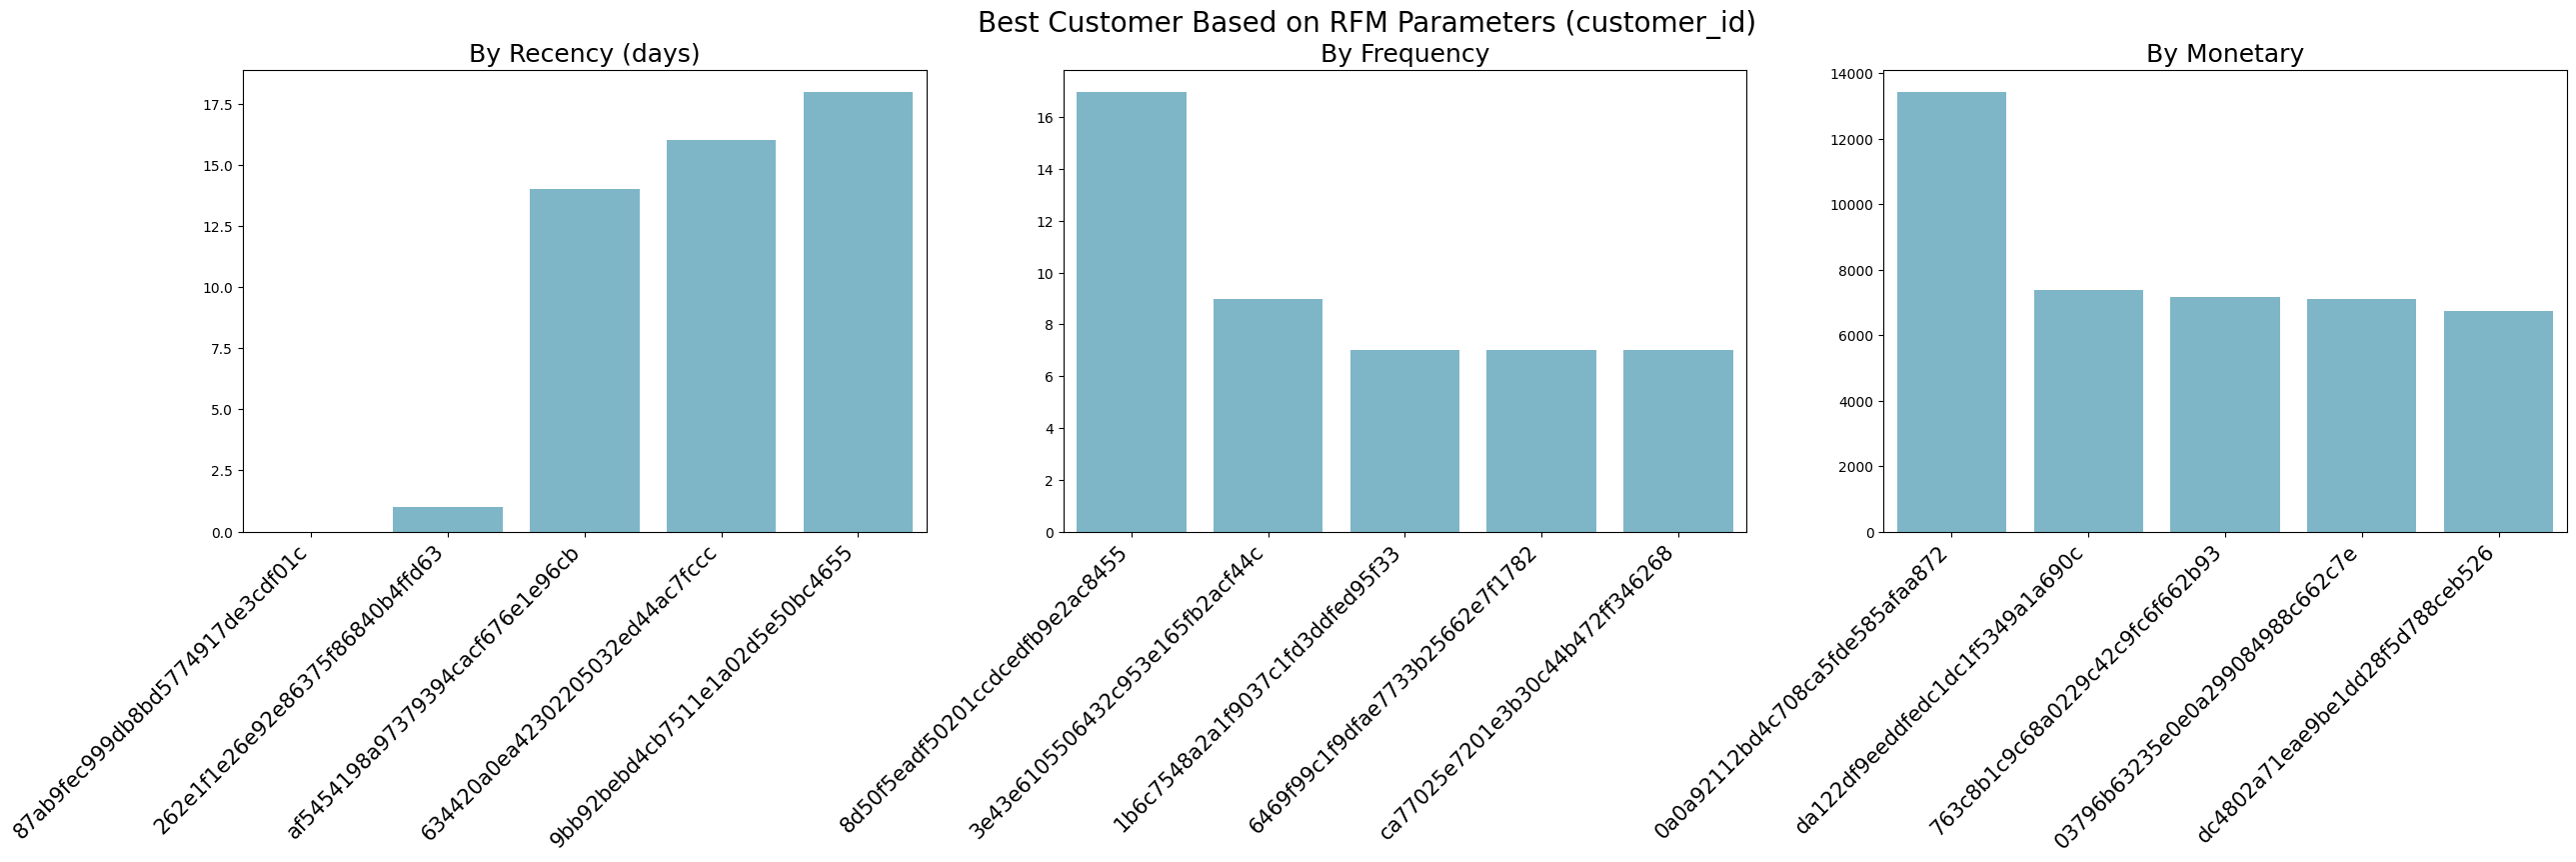

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# By Recency (days)
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

# By Frequency
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')

# By Monetary
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha='right')

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()


## Conclusion

- Kategori produk apa yang sedikit dan banyak diminati berdasarkan jumlah pesanan?
Kategori Produk yang paling banyak diminati berdasarkan jumlah pesanan adalah bed bath services dengan jumlah order 9534 dan Kategori Produk yang paling sedikit diminati berdasarkan jumlah pesanan adalah security and services dengan jumlah order 2
- Wilayah mana yang memiliki pelanggan paling banyak?
Berdasarkan data, pelanggan yang paling banyak berada di wilayah yang besar seperti Sao Paulo, Rio de Janiero yang merupakan wilayah padat penduduk.
- Kapan terakhir pelanggan melakukan transaksi?
Data menunjukkan recency untuk masing-masing pelanggan, yang mengindikasikan jumlah hari sejak transaksi terakhir dilakukan. Pelanggan dengan recency 160 hari adalah yang terakhir melakukan transaksi.
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
Semua pelanggan dalam data ini memiliki frequency sebesar 1, artinya setiap pelanggan hanya melakukan satu transaksi dalam periode yang dianalisis.
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?
Pelanggan dengan monetary tertinggi adalah yang menghabiskan $259.80

In [143]:
all_data.to_csv('all_data.csv', index=False)

In [144]:
# save to google drive
from google.colab import drive
drive.mount('/content/drive')

all_data.to_csv('/content/drive/MyDrive/all_data.csv', index=False)

Mounted at /content/drive
